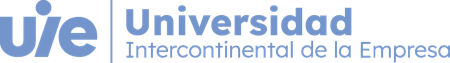

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

In [1]:
__author__ = "Alex Caride Cid"

# PLD1. EDA del Conjunto de Datos _Pingüinos de Palmer_

En el Campus Virtual encontrará un archivo CSV con el conjunto de datos _Pingüinos de Palmer_: `palmer_penguins.csv`. Este conjunto de datos contiene información sobre pingüinos de varias especies diferentes. En este ejercicio, se le pide que realice un análisis exploratorio de los datos (EDA) sobre este conjunto de datos dado. Considere que usted es un científico de datos al que le han proporcionado este conjunto de datos para que plantee diferentes casos de uso y desarrolle modelos predictivos interesantes para un equipo de investigación de biología marina.

Siéntase con libertad para realizar cualquier tipo de análisis que considere relevante. A continuación, se proporcionan algunas sugerencias de análisis que podría realizar:

1. Estrucutra de los datos. Dimensiones del conjunto de datos, tipos de datos, etc.
2. Estadísticas descriptivas. Resumen estadístico de las variables numéricas.
3. Distribución de las variables. Histogramas, diagramas de caja, etc.
4. Relaciones entre variables. Correlaciones, diagramas de dispersión, etc.
5. Análisis de valores perdidos. ¿Cómo manejaría los valores perdidos?
6. Análisis de valores atípicos. ¿Cómo manejaría los valores atípicos?
7. Análisis de la variable objetivo, de haberla. ¿Cómo es la distribución de la variable objetivo?

Para llevar a cabo este análisis, probablemente necesitará preparar algunas visualizaciones de datos. Considere que sus análisis tendrán que ser presentados al equipo, compuesto por personal no técnico, por lo que deberá ser capaz de explicar sus resultados de manera clara y concisa. Algunas librerías de Python que podrían serle útiles para este análisis son `pandas`, `matplotlib`, `seaborn`, etc.


In [2]:
import matplotlib.pyplot as plt  # autoflake: skip
import pandas as pd  # autoflake: skip
import plotly.express as px  # autoflake: skip
import seaborn as sns  # autoflake: skip

## Carga del conjunto de datos

In [3]:
# Cargamos datos del csv
penguins = pd.read_csv('palmer_penguins.csv')
penguins.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## EDA

### 1. Estrucutra de los datos. Dimensiones del conjunto de datos, tipos de datos, etc.

In [4]:
# Dimensiones del conjunto de datos
print("Dimensiones del conjunto de datos:", penguins.shape)

# Tipos de datos y resumen de las columnas
print("Información del conjunto de datos:")
penguins.info()

# Numero de duplicados
print("Número de filas duplicadas:")
print(penguins.duplicated().sum())

# Numero de nulos
print("Número de valores nulos por columna:")
penguins.isnull().sum()

Dimensiones del conjunto de datos: (344, 9)
Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
Número de filas duplicadas:
0
Número de valores nulos por columna:


id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### 2. Estadísticas descriptivas. Resumen estadístico de las variables numéricas.

In [5]:
# Resumen estadístico de las variables numéricas
penguins.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


### 3. Distribución de las variables. Histogramas, diagramas de caja, etc.

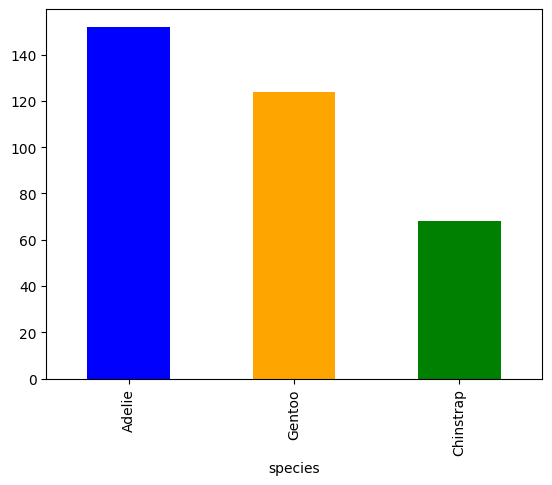

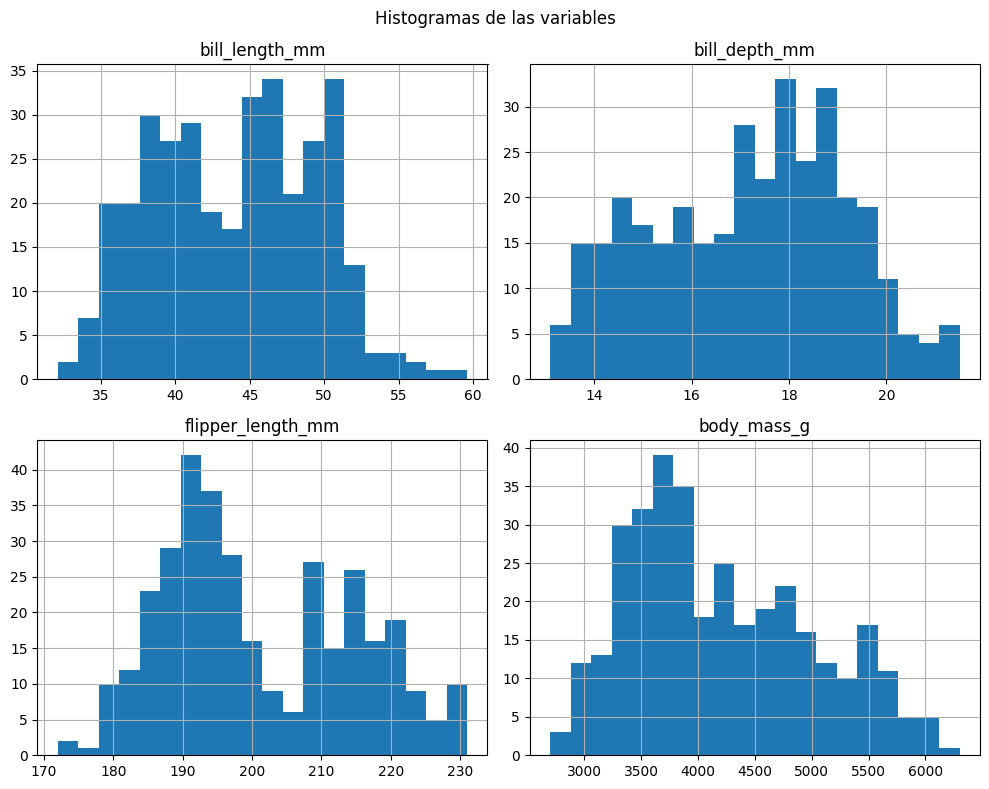

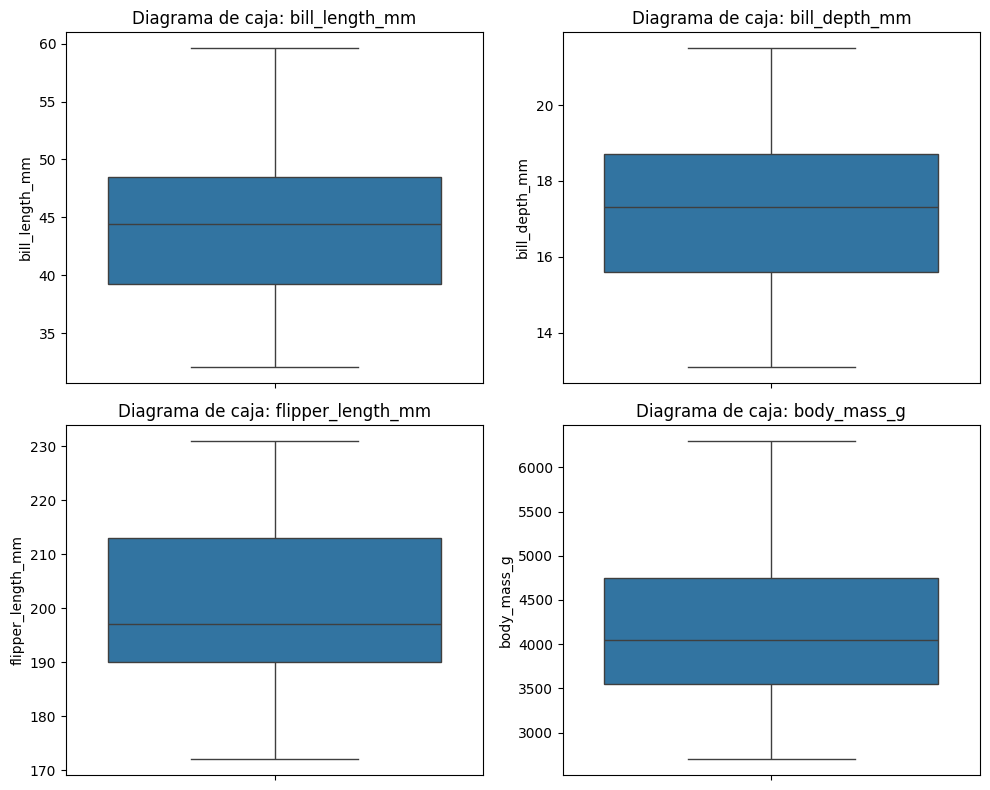

In [6]:
# Distribución de las especies de pinguinos
penguins["species"].value_counts().plot(kind="bar", color=["blue", "orange", "green"])


# Histogramas para las variables
num_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
penguins[num_columns].hist(bins=20, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Histogramas de las variables")
plt.tight_layout()
plt.show()

# Diagramas de caja para las variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=penguins, y=col)
    plt.title(f'Diagrama de caja: {col}')
plt.tight_layout()
plt.show()

### 4. Relaciones entre variables. Correlaciones, diagramas de dispersión, etc.

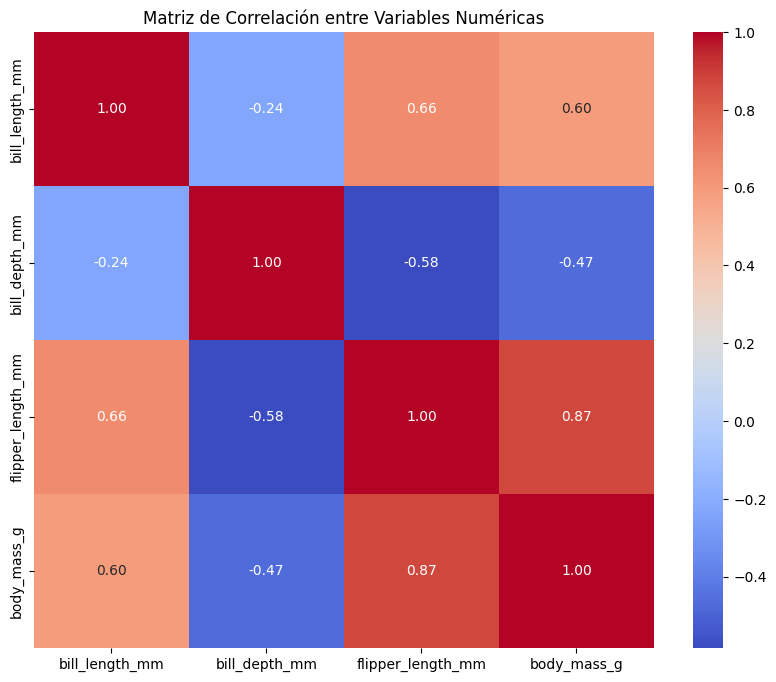

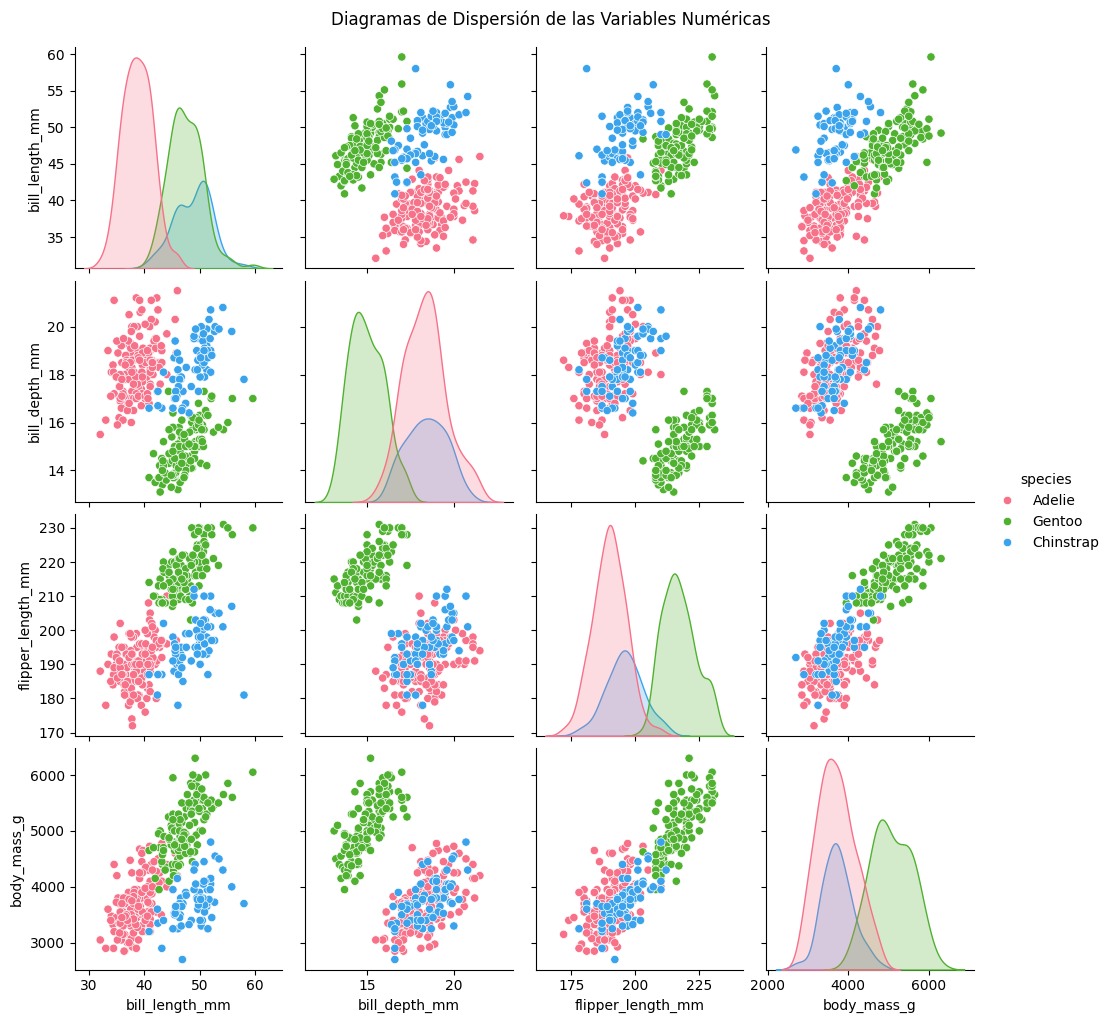

In [7]:
# Seleccionamos solo las columnas numéricas(omitimos id y year)
columnas_numericas = penguins.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'year'])

# Calculamos la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Mostramos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Diagramas de dispersión pareados para las variables numéricas
sns.pairplot(penguins, vars=num_columns, hue="species", diag_kind="kde", palette="husl")
plt.suptitle("Diagramas de Dispersión de las Variables Numéricas", y=1.02)
plt.show()

### 5. Análisis de valores perdidos. ¿Cómo manejaría los valores perdidos?

In [8]:
# Porcentaje de valores perdidos por columna
valores_perdidos = penguins.isnull().mean() * 100
print("Porcentaje de valores perdidos por columna:")
print(valores_perdidos)

# Identificamos las columnas con valores perdidos
print("Columnas con valores perdidos:")
print(valores_perdidos[valores_perdidos > 0])

# Verificamos si quedan valores perdidos
print("¿Quedan valores perdidos?")
print(penguins.isnull().sum().sum())

Porcentaje de valores perdidos por columna:
id                   0.000000
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
year                 0.000000
dtype: float64
Columnas con valores perdidos:
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64
¿Quedan valores perdidos?
19


### 6. Análisis de valores atípicos. ¿Cómo manejaría los valores atípicos?

In [9]:
# Identificamos valores atípicos 
atipicos = {}
for col in num_columns:
    Q1 = penguins[col].quantile(0.25)
    Q3 = penguins[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    atipicos[col] = penguins[(penguins[col] < limite_inferior) | (penguins[col] > limite_superior)]

# Mostramos el número de valores atípicos por variable
for col, datos_atipicos in atipicos.items():
    print(f"Valores atípicos en {col}: {len(datos_atipicos)}")

# En este caso no tenemos valores atípicos
print("No contamos con valores atípicos en las variables numéricas.")


Valores atípicos en bill_length_mm: 0
Valores atípicos en bill_depth_mm: 0
Valores atípicos en flipper_length_mm: 0
Valores atípicos en body_mass_g: 0
No contamos con valores atípicos en las variables numéricas.


### 7. Análisis de la variable objetivo, de haberla. ¿Cómo es la distribución de la variable objetivo?

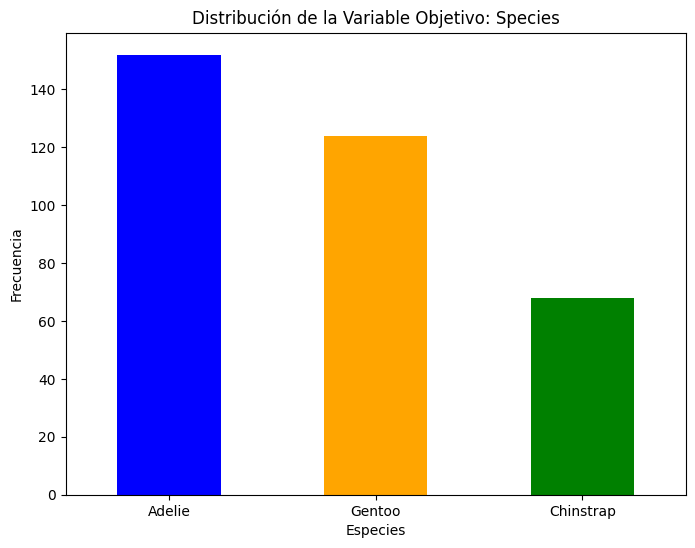

In [10]:
# He escogido esta variable como objetivo para la clasificación según las especies de pinguinos
species_counts = penguins["species"].value_counts()
species_counts.plot(kind="bar", color=["blue", "orange", "green"], figsize=(8, 6))
plt.title("Distribución de la Variable Objetivo: Species")
plt.xlabel("Especies")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

## Conclusiones


...

In [11]:
# Conclusiones

# En el análisis vimos que contamos con tres especies de pingüinos con distribuciones diferentes,  con algunos valores 
# nulos en ciertas columnas. Las variables numéricas muestran distribuciones variadas y no encontramos valores atípicos. También observamos correlaciones
# lógicas, como la relación entre el largo de la aleta y el peso, y en los diagramas de dispersión se aprecia cómo las especies tienden a agruparse.
# Con todo esto, tomamos la species como nuestra variable objetivo.